# Zeljko Stojkovic 2021230319 - Introduction to Machine Learning


# Instructions:
###  Linear Regression
- Choosing a dataset
- Plot the data
- Compute Cost Function
- Make a function that run gradient descent
- Compute Cost Function for multivariate Linear Regression
- Compute Cost for multivariate Gradient Descent
- Do the feature normalization
- Make a function that computes the normal equation.
### Logistic Regression
- Choosing a dataset
- Plot the data
- Make code that computes sigmoid function
- Compute the Logistic Regression Cost Function
- Make a prediction for the test sample
- Compute Regularized Cost Function
### Neural Networks
- Choosing a dataset
- Compute the gradient of the sigmoid function
- Randomly initialize weights
- Compute Neural network cost function
### Kmeans
- Choosing a dataset
- Plot the data
- Initialize K means centroids
- Find the closesr Centroids
- Compute Centroids means
- Run K means algorithm
- Plot each step of Kmeans as it processds

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
from random import seed, random
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### **1.1. Linear Regression (Single Feature)**

In [114]:
df = pd.read_csv('Student Study Hour V2.csv');
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


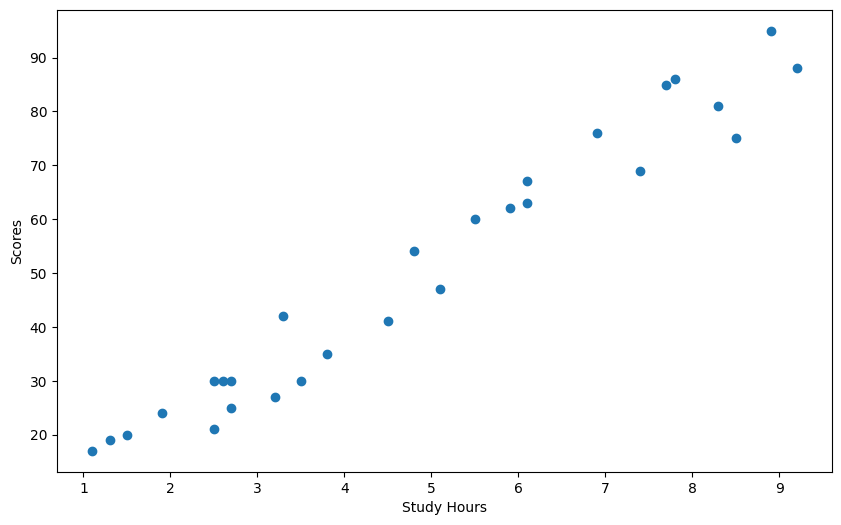

In [115]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

In [116]:
# b) Compute Cost Function

def compute_cost(m, b, points):
    total_error = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        total_error += (y - (m * x + b)) ** 2

    # mean squared error
    mse = total_error / float(len(points))
    return mse

In [117]:
# c) Make a function that run gradient descent

# For each point, we calculate how far our line y = mx + b is away from actual value
# After we use these differences to calculate how to change m and b.
def gradient_descent(m_now, b_now, points, L):

  # direction in which we need to change slope of line (weight)
  m_gradient = 0
  # direction in which we need to change y-intercept (bias)
  b_gradient = 0

  n = len(points)

  for i in range(n):
      x = points.iloc[i].Hours
      y = points.iloc[i].Scores

      m_gradient += (-2/n) * x * (y - (m_now * x + b_now))
      b_gradient += (-2/n) * (y - (m_now * x + b_now))

  # update m and b using the calculated gradients and learning rate, move in the opposite direction of the gradient to minimize error
  m = m_now - m_gradient * L
  b = b_now - b_gradient * L

  return m,b

In [118]:
m = 0
b = 0
L = 0.0001
epochs = 1000

for i in range(epochs):
  m,b = gradient_descent(m, b, df, L)

print(m, b)

9.902246157999524 1.6960412088970342


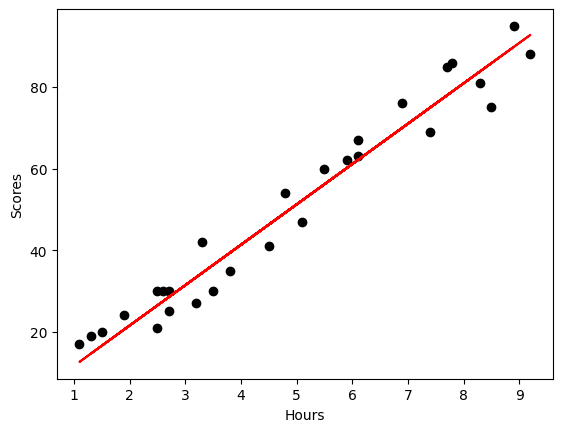

In [119]:
plt.scatter(df.Hours, df.Scores, color="black")
plt.plot(df.Hours, [m * x + b for x in df.Hours], color="red")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### **1.2. Linear Regression (Multivariate)**

In [120]:
df = pd.read_csv('Housing.csv')

In [121]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

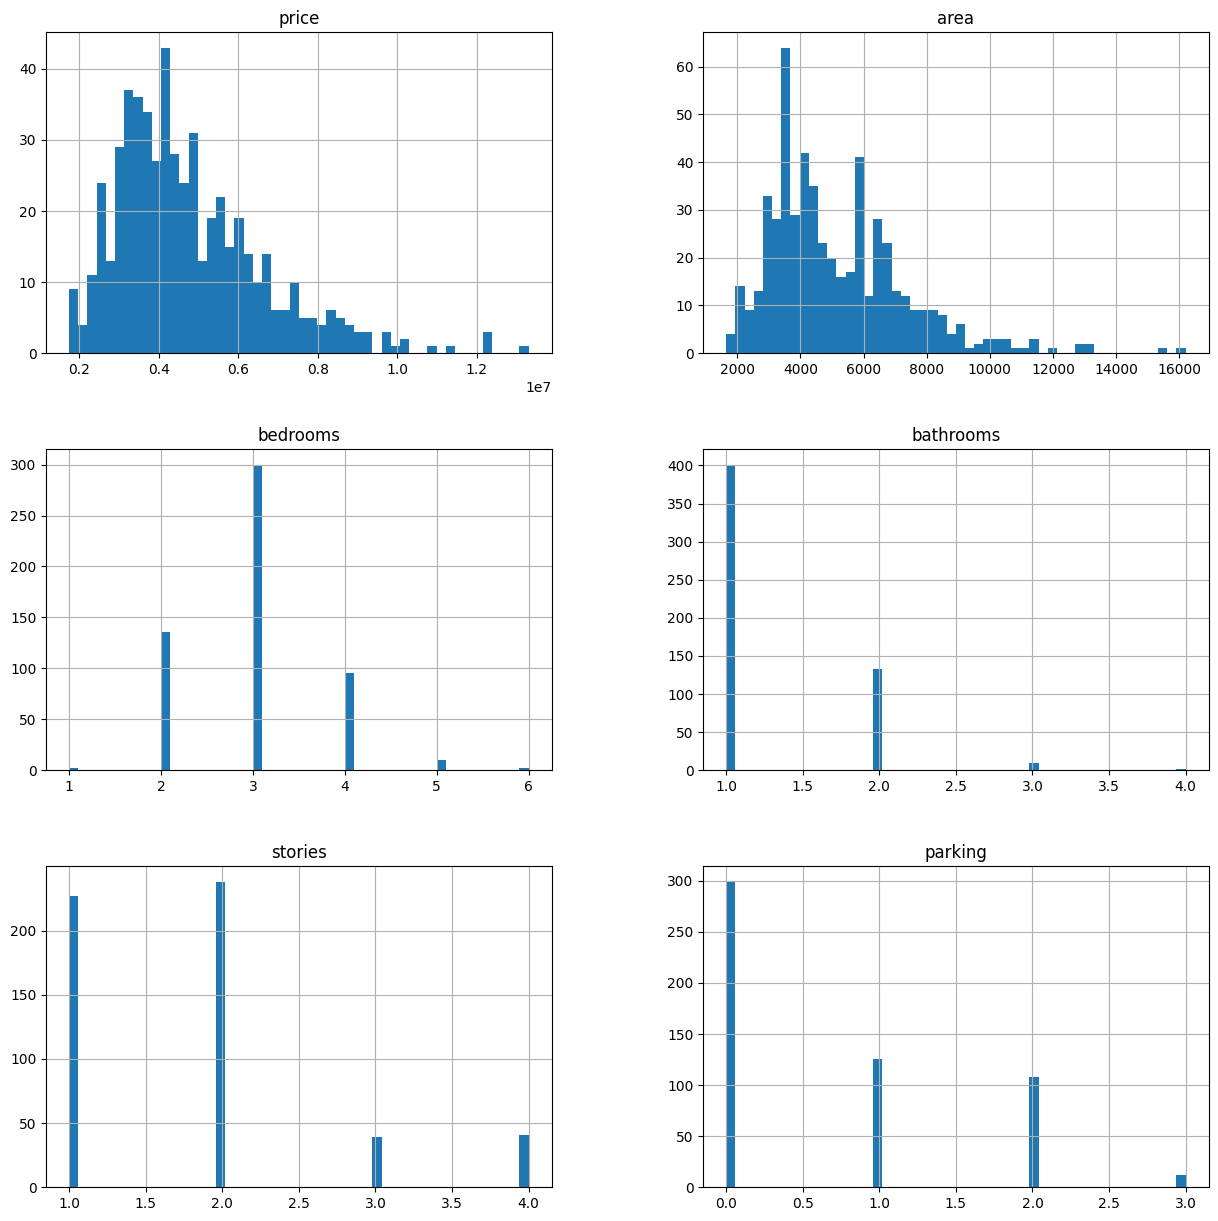

In [122]:
df.hist(bins=50, figsize=(15,15))

In [123]:
df.shape

(545, 13)

In [124]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values

In [125]:
def transpose(M):
    N = []
    for j in range(len(M[0])): # over rows
        U = []
        for i in range(len(M)): # over col
            U.append(M[i][j])
        N.append(U)

    return N

In [126]:
# f) Do the feature normalization
m, n = X.shape
mean = np.zeros(n)
std = np.zeros(n)

for i in range(n):
    mean[i] = np.mean(X[:, i])
    std[i] = np.std(X[:, i])
    for j in range(m):
        X[j, i] = (X[j, i] - mean[i]) / std[i]

In [127]:
# d) Compute Cost Function for multivariate Linear Regression
def compute_cost(X, y, W):
    m = len(y)
    y_estimated = X.dot(W)
    error = y_estimated - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

In [128]:
# e) Compute Cost for multivariate Gradient Descent
def gradient_descent(X, y, L=0.01, epochs=2000):
    m, n = X.shape
    X = np.column_stack((np.ones((m, 1)), X))
    W = np.random.randn(n + 1)

    cost_history_list = []

    for current_iteration in range(epochs):
        y_estimated = X.dot(W)
        error = y_estimated - y
        cost = compute_cost(X, y, W)
        gradient = (1 / m) * X.T.dot(error)
        W = W - L * gradient

        if current_iteration % 100 == 0:
            print(f"cost:{cost:.6f} \t iteration: {current_iteration}")

        cost_history_list.append(cost)

    return W, cost_history_list

cost:13106908992203.035156 	 iteration: 0
cost:1830749067984.826660 	 iteration: 100
cost:1029024582348.543945 	 iteration: 200
cost:954886929939.112183 	 iteration: 300
cost:938706414563.674683 	 iteration: 400
cost:930953566326.706177 	 iteration: 500
cost:926317395739.770386 	 iteration: 600
cost:923413061814.968994 	 iteration: 700
cost:921563483930.655762 	 iteration: 800
cost:920374087613.910400 	 iteration: 900
cost:919603645663.092651 	 iteration: 1000
cost:919101576704.257446 	 iteration: 1100
cost:918772686683.711792 	 iteration: 1200
cost:918556241489.086426 	 iteration: 1300
cost:918413204655.885254 	 iteration: 1400
cost:918318325590.226440 	 iteration: 1500
cost:918255178401.697021 	 iteration: 1600
cost:918213023102.983765 	 iteration: 1700
cost:918184804768.018555 	 iteration: 1800
cost:918165869551.482666 	 iteration: 1900


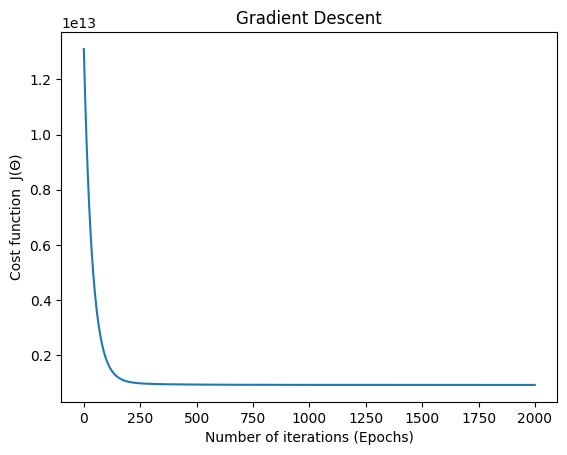

In [129]:
weight, cost_history_list = gradient_descent(X, y, L=0.01, epochs=2000)

plt.plot(np.arange(len(cost_history_list)), cost_history_list)
plt.xlabel("Number of iterations (Epochs)")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()

## **3) Neural Networks**

In [130]:
# b) Randomly initialize weights
def initialzie_network(inputNum, hiddenNum, outputNum):
  network = list()

  hidden_layer = [{'weights': [random() for i in range(inputNum + 1)]} for i in range(hiddenNum)]
  network.append(hidden_layer)
  output_layer = [{'weights': [random() for i in range(hiddenNum + 1)]} for i in range(outputNum)]
  network.append(output_layer)

  return network

### Sigmoid function

The sigmoid function, also known as the logistic function, is a mathematical function that maps any real-valued number to a value between 0 and 1. It has an S-shaped curve. In neural networks it's often used as an activation function in hidden layers and output layers.


`$$ \ f(z) = \frac{1}{1 + e^{-z}} $$`

In [131]:
def sigmoid(z):
    return 1.0 / (1.0 + exp(-z))

### Weighted Sum Calculation

It iterates throught all weights expect the last one (bias), for each weight it multiplies it by the corresponding input and adds the result to z.

$$ f(\mathbf{w}, \mathbf{x}) = b + \sum_{i=1}^{n} w_i x_i $$

In [132]:
def weighted_sum(weights, inputs):
    z = weights[-1]
    for i in range(len(weights)-1):
        z += weights[i] * inputs[i]
    return z

 ### Forward Propagate
 Performs the forward pass through the neural network
 Parameters: network (list of layers), sample (input data)

In [133]:
def forward_propagate(network, sample):
    inputs = sample
    for layer in network:
        new_inputs = []
        for neuron in layer:
            z = weighted_sum(neuron['weights'], inputs)
            neuron['output'] = sigmoid(z)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

### Sigmoid derivate
When we're backpropagating the errors in a network throught a layer with a sigmoid activation fucntion, f(x) has already been computed, during the forward pass. If we cache that matrix we can calculate the derivate now with just a few simple matrix operation.

$$ \ f(z) = {1 - f(z)} $$


ref: https://beckernick.github.io/sigmoid-derivative-neural-network/

In [134]:
def sigmoid_derivative(output):
    return output * (1.0 - output)

### Backward Propagate
Performs the backward pass throught the nerual network, and calculates the error for each neuron.


In [135]:
def backward_propagate(network, y):
                              # [1,0]
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()

        # hidden layer
        # 3)
        if i != len(network) - 1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error = error+ neuron['weights'][j] * neuron['delta']
                    errors.append(error)

        # output layer
        # 1)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                error = y[j] - neuron['output']
                errors.append(error)
        # 2), 4) ...
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j]* sigmoid_derivative(neuron['output'])

### Update Weights

Performs the weights update of the neurons in the network based on the calculated delta values during backward propagation


In [136]:
def update_weights(network, sample, L):
    for i in range(len(network)):
        inputs = sample[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] = neuron['weights'][j] + L * neuron['delta'] * inputs[j]
            neuron['weights'][-1] = neuron['weights'][-1] + L * neuron['delta']

###  Train Network

In [137]:
def train_network(network, training_data, L, epochs, n_output):
    costs = []

    for epoch in range(epochs):
        total_error = 0

        for sample in training_data:
            inputs = sample[:-1]

            expected_outputs = [0 for _ in range(n_output)]
            expected_outputs[int(sample[-1])] = 1

            outputs = forward_propagate(network, inputs)

            error = sum([(expected_outputs[i] - outputs[i]) ** 2 for i in range(len(outputs))]) / 2
            total_error += error

            backward_propagate(network, expected_outputs)
            update_weights(network, inputs, L)

        average_error = total_error / len(training_data)
        costs.append(average_error)

        print(f'Epoch {epoch + 1}/{epochs}, Learning Rate: {L}, Cost: {average_error:.2f}')

    plt.plot(range(epochs), costs)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Cost over Training Epochs')
    plt.show()

In [139]:
wine = load_wine()
X, y = wine.data, wine.target

X = (X - X.min()) / (X.max() - X.min())

In [140]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.15, random_state=1, shuffle=True)
training_data = np.c_[Xtrain, yTrain]
test_data = np.c_[Xtest, yTest]

seed(1)
training_data = np.c_[Xtrain,yTrain]
test_data = np.c_[Xtest,yTest]

Epoch 1/200, Learning Rate: 0.5, Cost: 0.97
Epoch 2/200, Learning Rate: 0.5, Cost: 0.75
Epoch 3/200, Learning Rate: 0.5, Cost: 0.75
Epoch 4/200, Learning Rate: 0.5, Cost: 0.75
Epoch 5/200, Learning Rate: 0.5, Cost: 0.73
Epoch 6/200, Learning Rate: 0.5, Cost: 0.59
Epoch 7/200, Learning Rate: 0.5, Cost: 0.59
Epoch 8/200, Learning Rate: 0.5, Cost: 0.59
Epoch 9/200, Learning Rate: 0.5, Cost: 0.59
Epoch 10/200, Learning Rate: 0.5, Cost: 0.47
Epoch 11/200, Learning Rate: 0.5, Cost: 0.37
Epoch 12/200, Learning Rate: 0.5, Cost: 0.36
Epoch 13/200, Learning Rate: 0.5, Cost: 0.36
Epoch 14/200, Learning Rate: 0.5, Cost: 0.35
Epoch 15/200, Learning Rate: 0.5, Cost: 0.35
Epoch 16/200, Learning Rate: 0.5, Cost: 0.34
Epoch 17/200, Learning Rate: 0.5, Cost: 0.34
Epoch 18/200, Learning Rate: 0.5, Cost: 0.33
Epoch 19/200, Learning Rate: 0.5, Cost: 0.33
Epoch 20/200, Learning Rate: 0.5, Cost: 0.32
Epoch 21/200, Learning Rate: 0.5, Cost: 0.32
Epoch 22/200, Learning Rate: 0.5, Cost: 0.31
Epoch 23/200, Learn

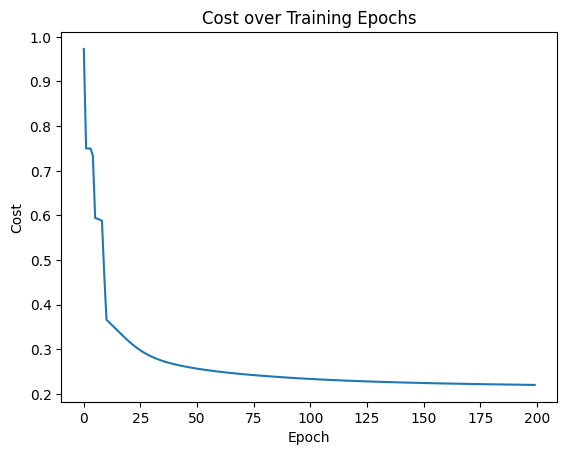

[{'weights': [0.6062507876072671, 0.06246256598469262, 0.4221223231859763, -0.39320881324151513, 0.971332011396787, 1.0013524017797106, 0.7076351139669155, 0.1265739429107998, 0.6626677717649537, 0.6581913335575369, 0.8307128767516757, 0.8668856949583166, 0.7310380068460375, -0.8039301320220235], 'output': 0.41386677711693054, 'delta': 0.17703060789327857}, {'weights': [0.44891457535438023, 0.4480483901612181, 0.39829968438885494, -0.144464278590786, 1.9838455126393049, 0.1866021233401627, 0.1734156758706408, 0.2473119283334329, 0.20076502613332792, 1.4577035658969464, 0.5000903956919723, 0.19852924073939293, 0.4292171054788668, -2.3835600134352144], 'output': 0.11746195151554145, 'delta': 0.07718286416731322}, {'weights': [0.6619651602650317, 0.6005088423394148, 0.4038679915511381, -0.025746155242201193, 1.0377862200492078, 0.09704555688239108, 0.81877963947674, 0.053682942049717054, 0.7521621683146293, 0.5705378658961822, 0.672317635451857, 0.6013325475277829, 0.1291756754568837, -3.

In [144]:
inputNum = len(training_data[0]) - 1
outputNum = len(set([sample[-1] for sample in training_data]))
hiddenNUm = len(yTrain) // (5 * (inputNum - outputNum))

network = initialzie_network(inputNum, hiddenNumber, outputNum)
L = 0.5
epochs = 200

# Train the network
train_network(network, training_data, L, epochs, outputNum)

# Print the network after training
for layer in network:
    print(layer)